In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from astropy.table import Table
from astropy.io import fits
import pandas as pd

import euclidlike

# Read in catalog for Euclidlike Coadd

In [2]:
d = fits.getdata("/hildafs/projects/phy200017p/share/euclid_sim/output_public_area/euclidlike_cat.fits", 2)
t = np.load("/hildafs/projects/phy200017p/share/euclid_sim/output_public_area/euclidlike_true_catalog.npy")

d["MAG_AUTO"] = d["MAG_AUTO"] + euclidlike.getBandpasses()["VIS"].zeropoint + 2.5 * np.log10(euclidlike.collecting_area * euclidlike.long_exptime) - 2.5 * np.log10(euclidlike.gain)
t["mag"] = t["mag"] + 2.5 * np.log10(euclidlike.collecting_area * euclidlike.long_exptime)

# Read in ERO public data

In [3]:
ero_path = "/hildafs/projects/phy200017p/share/euclid_sim/ERO/ERO-Perseus-VIS-CAT"
ero_cat_path = os.path.join(ero_path, "Euclid-VIS-ERO-Perseus-Flattened.DR3.cat")
outfile = os.path.splitext(ero_cat_path)[0] + '.table.fits'

if not os.path.exists(outfile):
    params = ['NUMBER', 'X_IMAGE', 'Y_IMAGE', 'ID_PARENT', 'EXT_NUMBER', 'FLUX_ISO', 
            'FLUXERR_ISO', 'MAG_ISO', 'MAGERR_ISO', 'FLUX_ISOCOR', 'FLUXERR_ISOCOR', 
            'MAG_ISOCOR', 'MAGERR_ISOCOR', 'FLUX_APER1', 'FLUX_APER2', 'FLUX_APER3', 
            'FLUX_APER4', 'FLUX_APER5', 'FLUX_APER6', 'FLUX_APER7', 'FLUX_APER8', 
            'FLUX_APER9', 'FLUX_APER10', 'FLUXERR_APER1', 'FLUXERR_APER2', 'FLUXERR_APER3', 
            'FLUXERR_APER4', 'FLUXERR_APER5', 'FLUXERR_APER6', 'FLUXERR_APER7', 'FLUXERR_APER8', 
            'FLUXERR_APER9', 'FLUXERR_APER10', 'MAG_APER1', 'MAG_APER2', 'MAG_APER3', 'MAG_APER4', 
            'MAG_APER5', 'MAG_APER6', 'MAG_APER7', 'MAG_APER8', 'MAG_APER9', 'MAG_APER10', 
            'MAGERR_APER1', 'MAGERR_APER2', 'MAGERR_APER3', 'MAGERR_APER4', 'MAGERR_APER5', 
            'MAGERR_APER6', 'MAGERR_APER7', 'MAGERR_APER8', 'MAGERR_APER9', 'MAGERR_APER10', 
            'FLUX_AUTO', 'FLUXERR_AUTO', 'MAG_AUTO', 'MAGERR_AUTO', 'KRON_RADIUS', 'FLUX_PETRO', 
            'FLUXERR_PETRO', 'MAG_PETRO', 'MAGERR_PETRO', 'PETRO_RADIUS', 'FLUX_GROWTH', 
            'FLUX_GROWTHSTEP', 'MAG_GROWTH', 'MAG_GROWTHSTEP', 'FLUX_RADIUS', 'BACKGROUND', 
            'MU_MAX', 'X_FOCAL', 'Y_FOCAL', 'X_WORLD', 'Y_WORLD', 'ALPHA_SKY', 'DELTA_SKY', 
            'ALPHA_J2000', 'DELTA_J2000', 'ALPHA_B1950', 'DELTA_B1950', 'ERRX2_IMAGE', 
            'ERRY2_IMAGE', 'ERRXY_IMAGE', 'ERRA_IMAGE', 'ERRB_IMAGE', 'ERRTHETA_IMAGE', 
            'ERRCXX_IMAGE', 'ERRCYY_IMAGE', 'ERRCXY_IMAGE', 'XPEAK_IMAGE', 'YPEAK_IMAGE', 
            'XPEAK_FOCAL', 'YPEAK_FOCAL', 'XPEAK_WORLD', 'YPEAK_WORLD', 'ALPHAPEAK_SKY', 
            'DELTAPEAK_SKY', 'ALPHAPEAK_J2000', 'DELTAPEAK_J2000', 'ALPHAPEAK_B1950', 'DELTAPEAK_B1950', 
            'XMIN_IMAGE', 'YMIN_IMAGE', 'XMAX_IMAGE', 'YMAX_IMAGE', 'XWIN_IMAGE', 'YWIN_IMAGE', 
            'ERRX2WIN_IMAGE', 'ERRY2WIN_IMAGE', 'ERRXYWIN_IMAGE', 'ERRAWIN_IMAGE', 'ERRBWIN_IMAGE', 
            'ERRTHETAWIN_IMAGE', 'ERRCXXWIN_IMAGE', 'ERRCYYWIN_IMAGE', 'ERRCXYWIN_IMAGE', 
            'X2_IMAGE', 'Y2_IMAGE', 'XY_IMAGE', 'A_IMAGE', 'B_IMAGE', 'THETA_IMAGE', 
            'ELONGATION', 'ELLIPTICITY', 'CXX_IMAGE', 'CYY_IMAGE', 'CXY_IMAGE', 
            'ISOAREAF_IMAGE', 'ISOAREA_IMAGE', 'X2WIN_IMAGE', 'Y2WIN_IMAGE', 
            'XYWIN_IMAGE', 'CXXWIN_IMAGE', 'CYYWIN_IMAGE', 'CXYWIN_IMAGE', 'AWIN_IMAGE', 
            'BWIN_IMAGE', 'THETAWIN_IMAGE', 'CLASS_STAR', 'FWHM_IMAGE', 'XPSF_IMAGE', 
            'YPSF_IMAGE', 'ALPHAPSF_J2000', 'DELTAPSF_J2000', 'FLUX_PSF', 'FLUXERR_PSF', 
            'MAG_PSF', 'MAGERR_PSF', 'FLUX_POINTSOURCE', 'FLUXERR_POINTSOURCE', 'MAG_POINTSOURCE', 
            'MAGERR_POINTSOURCE', 'FLUX_DISK', 'FLUXERR_DISK', 'MAG_DISK', 'MAGERR_DISK', 
            'MU_MAX_DISK', 'MU_EFF_DISK', 'MU_MEAN_DISK', 'FLUX_SPHEROID', 'FLUXERR_SPHEROID', 
            'MAG_SPHEROID', 'MAGERR_SPHEROID', 'MU_MAX_SPHEROID', 'MU_EFF_SPHEROID', 
            'MU_MEAN_SPHEROID', 'DISK_INCLINATION', 'DISK_INCLINATIONERR', 'DISK_THETA_IMAGE', 
            'DISK_THETAERR_IMAGE', 'SPHEROID_SERSICN', 'SPHEROID_SERSICNERR', 'SPHEROID_THETA_IMAGE', 
            'SPHEROID_THETAERR_IMAG', 'SPHEROID_REFF_IMAGE', 'SPHEROID_REFFERR_IMAGE', 'FLUX_MODEL', 
            'FLUXERR_MODEL', 'MAG_MODEL', 'MAGERR_MODEL', 'MU_MAX_MODEL', 'FLUX_MAX_MODEL', 
            'FLUX_EFF_MODEL', 'FLUX_MEAN_MODEL', 'MU_EFF_MODEL', 'MU_MEAN_MODEL', 'XMODEL_IMAGE', 
            'YMODEL_IMAGE', 'CXXMODEL_IMAGE', 'CYYMODEL_IMAGE', 'CXYMODEL_IMAGE', 'SPREAD_MODEL', 
            'SPREADERR_MODEL', 'NOISEAREA_MODEL', 'NITER_MODEL']

    df = pd.read_csv(ero_cat_path, comment='#', header=None, delim_whitespace=True,
                    usecols=range(len(params)), names=params) 

    t = Table.from_pandas(df)
    t.write(outfile, overwrite=True)

ero_cat_path = outfile
ero_cat = fits.getdata(ero_cat_path)

# Comparing Measured vs Truth vs ERO

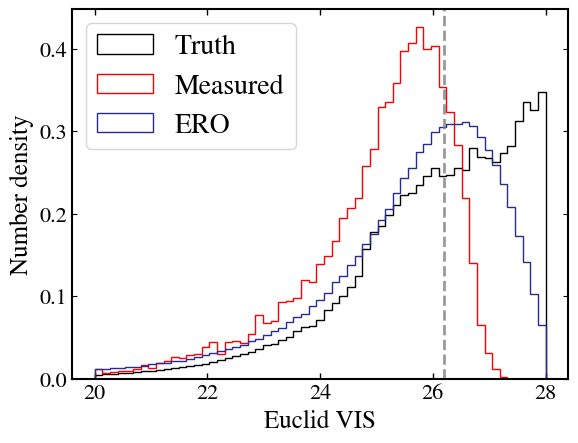

In [4]:
binning = np.linspace(20, 28, 60)
plt.hist(t["mag"], bins=binning, histtype='step', color='k', density=True, label='Truth')
plt.hist(d["MAG_AUTO"], bins=binning, histtype='step', color='r', density=True, label='Measured')
plt.hist(ero_cat["MAG_AUTO"], bins=binning, histtype='step', color='C0', density=True, label='ERO')
plt.axvline(26.2, c='gray', ls='dashed', alpha=0.8)
#plt.xlim(20, 27)
plt.legend();
plt.xlabel('Euclid VIS')
plt.ylabel('Number density');

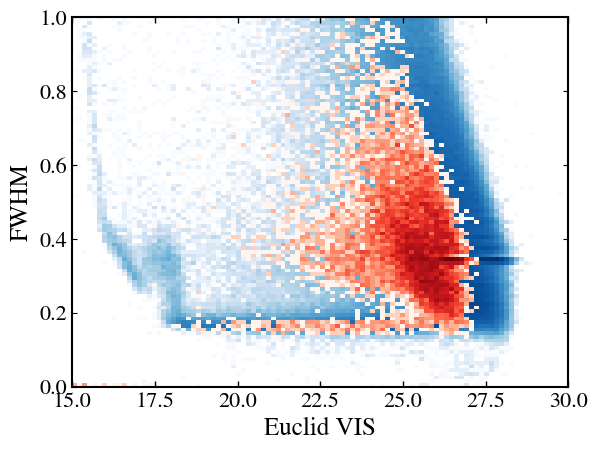

In [5]:
plt.hist2d(ero_cat["MAG_AUTO"], ero_cat["FWHM_IMAGE"] * euclidlike.pixel_scale, bins=100, cmap="Blues", range=[[15, 30], [0, 1]], norm=LogNorm(), rasterized=True, label='Measured');
plt.hist2d(d["MAG_AUTO"], d["FWHM_IMAGE"] * euclidlike.pixel_scale, bins=100, cmap="Reds", range=[[15, 30], [0, 1]], norm=LogNorm(), rasterized=True, label='ERO');
plt.xlabel("Euclid VIS")
plt.ylabel("FWHM");

Text(0, 0.5, 'FLUX_RADIUS (pix)')

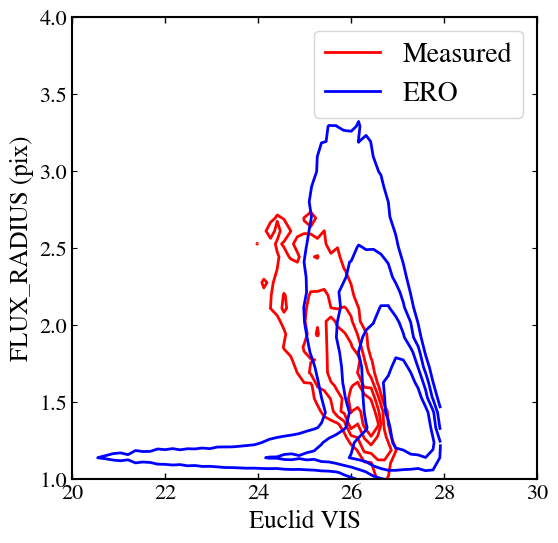

In [6]:
mag_min = 20
mag_max = 28
fr_min = 0
fr_max = 5
m_det = (d["MAG_AUTO"] < mag_max) & (d["MAG_AUTO"] > mag_min) & (d["FLUX_RADIUS"] < fr_max) & (d["FLUX_RADIUS"] > fr_min)
m_ero = (ero_cat["MAG_AUTO"] < mag_max) & (ero_cat["MAG_AUTO"] > mag_min) & (ero_cat["FLUX_RADIUS"] < fr_max) & (ero_cat["FLUX_RADIUS"] > fr_min)

hist_det = np.histogram2d(d["MAG_AUTO"][m_det], d["FLUX_RADIUS"][m_det], 50)
hist_ero = np.histogram2d(ero_cat["MAG_AUTO"][m_ero], ero_cat["FLUX_RADIUS"][m_ero], 50)


x_det = np.mean([hist_det[1][:-1], hist_det[1][1:]], axis=0)
y_det = np.mean([hist_det[2][:-1], hist_det[2][1:]], axis=0)

x_ero = np.mean([hist_ero[1][:-1], hist_ero[1][1:]], axis=0)
y_ero = np.mean([hist_ero[2][:-1], hist_ero[2][1:]], axis=0)


plt.figure(figsize=(6, 6))
plt.contour(x_det, y_det, hist_det[0].T/np.max(hist_det[0]), [0.2, 0.4, 0.6, 0.8, 1.0], colors='r')
plt.contour(x_ero, y_ero, hist_ero[0].T/np.max(hist_ero[0]), [0.2, 0.4, 0.6, 0.8, 1.0], colors='blue')

plt.xlim(20, 30)
plt.ylim(1, 4)
plt.legend([plt.Line2D((0, 0), (1, 1), c='r'), plt.Line2D((0, 0), (1, 1), c='blue')], ["Measured", "ERO"])
plt.xlabel("Euclid VIS")
plt.ylabel("FLUX_RADIUS (pix)")